In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
 df = pd.read_csv('medical_insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Basic Check

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


# Insights

1. Age Distribution

Mean age: ~39.1 years

Range: 18 to 64 years

Insight: The dataset likely consists of adults ranging from young adults to near-retirement age. The wide standard deviation (~14.1) shows a diverse age distribution.

2. BMI (Body Mass Index)

Mean BMI: ~30.7 (borderline obese according to WHO standards)

Range: 15.96 to 53.13

Insight: Many individuals fall into overweight or obese categories, indicating potential health risks and possibly higher insurance charges.

3. Children

Average number of children: ~1.1

Most people have: 0 to 2 children (75% quantile = 2)

Insight: Majority of the individuals have few or no children; 25% have none, 50% have one or fewer.

4.Charges (Presumably Insurance Charges)

Mean charges: ~$13,261

Range: $1,121.87 to  $63,770.43

Skewed Distribution: Median (~$9,333) < Mean → Right-skewed

Insight: A small number of individuals incur very high charges, pulling up the mean. These could be due to higher BMI, more children, age, or chronic conditions.

🔍 Overall Insight

The data shows a right-skewed distribution for charges.

There may be correlation between high charges and higher BMI, age, or number of children.

Further analysis with correlation and visualizations (like boxplots or histograms) would help confirm patterns.

# Data Cleaning

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Not Null value is not present

# Data Preproseccing

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Now Convert Categorical value to Numerical value

## Encoding: Convert categorical variables (e.g., Label Encoding, One-Hot Encoding).

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['sex'])

In [12]:
df["gender"]

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: gender, Length: 1337, dtype: int32

In [13]:
df

,age,sex,bmi,children,smoker,region,charges,gender
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [14]:
df['smoker_encoded'] = le.fit_transform(df['smoker'])

In [15]:
df

,age,sex,bmi,children,smoker,region,charges,gender,smoker_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


# ONE - HOT encoding

In [16]:
Region_one = pd.get_dummies(df.region,dtype=int)

In [17]:
Region_one

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [18]:
df = pd.concat([Region_one,df],axis=1)

In [19]:
df

,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker,region,charges,gender,smoker_encoded
0,0,0,0,1,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,0,0,1,0,18,male,33.770,1,no,southeast,1725.55230,1,0
2,0,0,1,0,28,male,33.000,3,no,southeast,4449.46200,1,0
3,0,1,0,0,33,male,22.705,0,no,northwest,21984.47061,1,0
4,0,1,0,0,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,0,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,1,0,0,0,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,0,0,1,0,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,0,0,0,1,21,female,25.800,0,no,southwest,2007.94500,0,0


In [20]:
df.drop(columns=["sex", "smoker", "region"], inplace=True)

In [21]:
df

,northeast,northwest,southeast,southwest,age,bmi,children,charges,gender,smoker_encoded
0,0,0,0,1,19,27.900,0,16884.92400,0,1
1,0,0,1,0,18,33.770,1,1725.55230,1,0
2,0,0,1,0,28,33.000,3,4449.46200,1,0
3,0,1,0,0,33,22.705,0,21984.47061,1,0
4,0,1,0,0,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,0,50,30.970,3,10600.54830,1,0
1334,1,0,0,0,18,31.920,0,2205.98080,0,0
1335,0,0,1,0,18,36.850,0,1629.83350,0,0
1336,0,0,0,1,21,25.800,0,2007.94500,0,0


In [22]:
df = df[["age","bmi","gender","smoker_encoded","northeast","northwest","southeast","southwest","charges"]]

In [23]:
df

,age,bmi,gender,smoker_encoded,northeast,northwest,southeast,southwest,charges
0,19,27.900,0,1,0,0,0,1,16884.92400
1,18,33.770,1,0,0,0,1,0,1725.55230
2,28,33.000,1,0,0,0,1,0,4449.46200
3,33,22.705,1,0,0,1,0,0,21984.47061
4,32,28.880,1,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,1,0,0,1,0,0,10600.54830
1334,18,31.920,0,0,1,0,0,0,2205.98080
1335,18,36.850,0,0,0,0,1,0,1629.83350
1336,21,25.800,0,0,0,0,0,1,2007.94500


# Feature Selection

In [24]:
corr_r = df.corr()

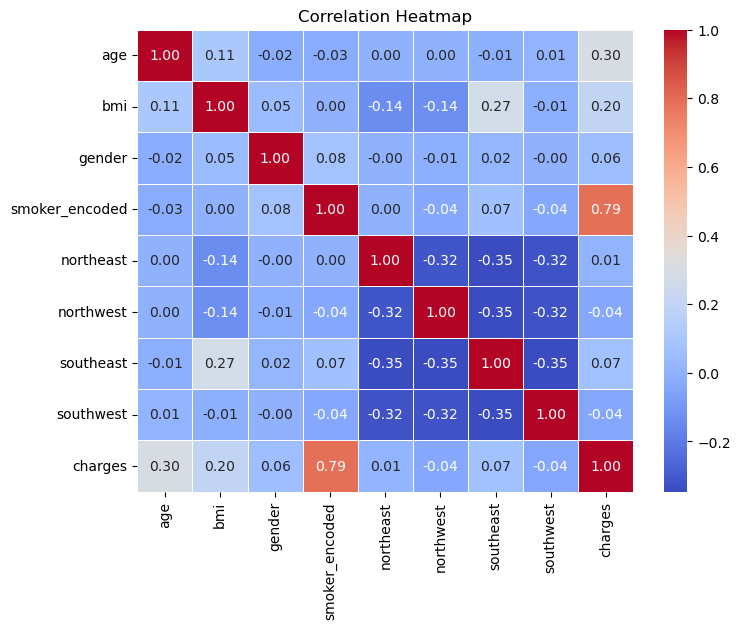

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_r, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
df = df[["smoker_encoded","age", "bmi","charges"]]

In [27]:
df

,smoker_encoded,age,bmi,charges
0,1,19,27.900,16884.92400
1,0,18,33.770,1725.55230
2,0,28,33.000,4449.46200
3,0,33,22.705,21984.47061
4,0,32,28.880,3866.85520
...,...,...,...,...
1333,0,50,30.970,10600.54830
1334,0,18,31.920,2205.98080
1335,0,18,36.850,1629.83350
1336,0,21,25.800,2007.94500


# Defining X and Y

In [28]:
X = df.drop(columns=["charges"])

In [29]:
y = df["charges"]

In [30]:
X

,smoker_encoded,age,bmi
0,1,19,27.900
1,0,18,33.770
2,0,28,33.000
3,0,33,22.705
4,0,32,28.880
...,...,...,...
1333,0,50,30.970
1334,0,18,31.920
1335,0,18,36.850
1336,0,21,25.800


In [31]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

# train and test spliting

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train

,smoker_encoded,age,bmi
1114,0,23,24.510
968,0,21,25.745
599,0,52,37.525
170,0,63,41.470
275,0,47,26.600
...,...,...,...
1096,1,51,34.960
1131,0,27,45.900
1295,0,20,22.000
861,0,38,28.000


In [35]:
X_test

,smoker_encoded,age,bmi
900,0,49,22.515
1064,0,29,25.600
1256,0,51,36.385
298,1,31,34.390
237,0,31,38.390
...,...,...,...
534,0,64,40.480
542,0,63,36.300
760,0,22,34.580
1284,1,61,36.300


In [36]:
y_train

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 1069, dtype: float64

In [37]:
y_test

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
760      3925.75820
1284    47403.88000
1285     8534.67180
Name: charges, Length: 268, dtype: float64

# Apply the Linear regression

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [39]:
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(X_test)

In [41]:
y_pred

array([ 8433.67443577,  4336.46678013, 13165.0382606 , 30593.69534864,
        8738.64384303, 13004.1887831 , 29273.63576136,  2177.09021482,
       10922.95093736, 10315.83022735, 11021.84491859, 33740.33309282,
       30613.92158231, 18004.87150727,  9656.23179762,  9311.37354392,
        4325.12010919, 32099.96630635,  3001.71338943,  5552.62898392,
        4325.12010919, 29913.00795743, 14580.01800456, 30752.45719245,
       31444.92261851,  4769.02189756, 35187.05259131, 37413.46842278,
       10952.8675722 , 12177.75978526,  6505.9651105 , 13121.95183512,
         870.87899962, 12471.87695664, 40355.37672202, 12499.04467281,
        2732.11267963,  2866.20850841, 32023.18474965,  9365.1280589 ,
        6903.0538664 , 29243.81679061, 34097.79751626, 11919.91981386,
        6896.22734444,  4145.55111435,  6040.33037213,  9173.38425823,
        4186.69945959,  8909.59778913,  6340.1295272 , 12053.6361681 ,
       30836.41015271,  4425.70495311, 10719.84316929,  9666.05445578,
      

# Model Evalution

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [43]:
mean_absolute_error(y_test,y_pred)

4191.704294603895

In [44]:
r2_score(y_test,y_pred)

0.8049502474643171

In [45]:
mean_squared_error(y_test,y_pred)

35841574.81814755

# Let's apply a Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
model_dt = DecisionTreeRegressor()

In [48]:
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
y_pred_dt = model_dt.predict(X_test)
y_pred_dt

array([10156.7832 ,  3353.284  , 10848.1343 , 37079.372  ,  4667.60765,
        8125.7845 , 37484.4493 ,  2709.1119 , 19144.57652,  8703.456  ,
       12957.118  , 24520.264  , 37079.372  , 12982.8747 ,  6196.448  ,
        8516.829  ,  1748.774  , 37742.5757 ,  2352.96845, 24671.66334,
        1748.774  , 20234.85475,  8125.7845 , 22331.5668 , 36950.2567 ,
       26018.95052, 43753.33705, 45008.9555 ,  8116.68   , 26392.26029,
        5425.02335,  9541.69555,  1121.8739 , 12233.828  , 48549.17835,
        9283.562  ,  1253.936  ,  4906.40965, 22412.6485 ,  8515.7587 ,
        1633.9618 , 18767.7377 , 41034.2214 ,  9630.397  ,  7526.70645,
        5312.16985,  1634.5734 ,  6849.026  ,  5312.16985,  6238.298  ,
        4449.462  ,  5662.225  , 21880.82   ,  1880.487  ,  7160.3303 ,
        8413.46305, 19749.38338,  3176.8159 , 36950.2567 ,  9222.4026 ,
        8125.7845 ,  5729.0053 , 11488.31695,  2304.0022 , 11538.421  ,
        9863.4718 ,  5397.6167 , 21774.32215, 16884.924  , 12979

In [50]:
mean_absolute_error(y_test,y_pred)

4191.704294603895

In [51]:
r2_score(y_test,y_pred_dt)

0.7925347714696434

# Hyperparameter GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_cv_dt = best_model.predict(X_test)

print("Tuned R² Score:", r2_score(y_test, y_pred_cv_dt))

Tuned R² Score: 0.8996212293822577


In [53]:
mean_absolute_error(y_test,y_pred_cv_dt)

2484.2918670361023

# Let's Apply the Random Forest 

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))

Random Forest R² Score: 0.8787899761054974


In [55]:
mean_absolute_error(y_test,y_pred_rf)

2617.455822421019

# Gradient Boosting - $ XGBOOST

In [56]:
import xgboost as xgb
from sklearn.metrics import r2_score

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred_XG = model.predict(X_test)

print("XGBoost R² Score:", r2_score(y_test, y_pred_XG))

XGBoost R² Score: 0.892818352376003


In [57]:
# Define model and parameter grid
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=3, scoring='r2', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions and Evaluation
y_pred = best_model.predict(X_test)
print("Best Params:", grid_search.best_params_)
print("Tuned R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Tuned R² Score: 0.901921920565871
MSE: 18022441.845525846


In [59]:
import pickle

# Save the best model
with open('xgboost_best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)